In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Datasets/clean.csv')
data = data.drop(['Unnamed: 0', 'id', 'adult', 'imdb_id', 'overview', 'tagline'], axis=1)
data_genres_list = data.copy(deep=True)
data_genres_list.genres = data_genres_list.genres.apply(lambda x: eval(x) if pd.notna(x) else x)
data.columns

Index(['title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'budget', 'original_language', 'original_title',
       'popularity', 'genres', 'production_companies', 'production_countries',
       'spoken_languages', 'keywords'],
      dtype='object')

## Release Date

In [3]:
data.release_date

0         2010-07-15
1         2014-11-05
2         2008-07-16
3         2009-12-15
4         2012-04-25
             ...    
526235    2011-03-10
526236    2020-09-17
526237    2013-07-10
526238    2018-12-12
526239    2012-05-06
Name: release_date, Length: 526240, dtype: object

## Vote Averages

### Vote Average Distribution

In [4]:
data.vote_average.min()

np.float64(0.5)

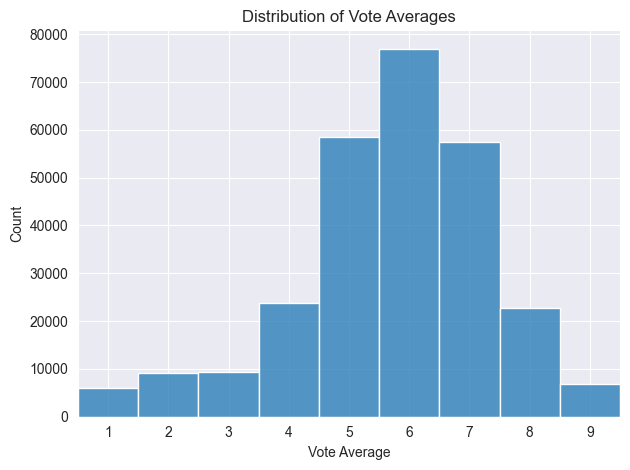

In [5]:
ax = sns.histplot(data.vote_average, bins=np.arange(0, 11)-0.5)
ax.set_xticks(range(0, 10))
ax.set_xlim(xmin=0.5, xmax=9.5)
ax.set_xlabel('Vote Average')
ax.set_title('Distribution of Vote Averages')
plt.tight_layout()
plt.show()

### by Budget

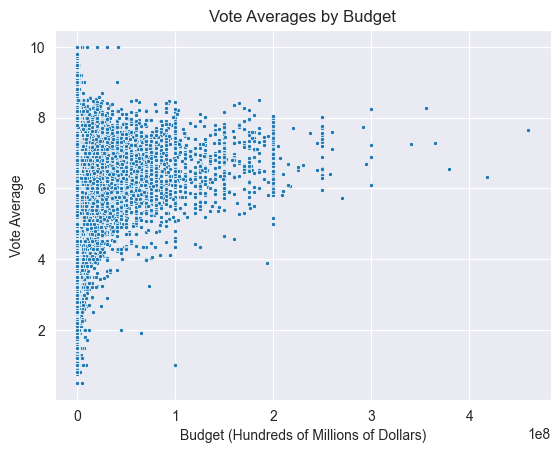

In [6]:
ax = sns.scatterplot(data, x='budget', y='vote_average', marker='.')
ax.set_title("Vote Averages by Budget")
ax.set_xlabel("Budget (Hundreds of Millions of Dollars)")
ax.set_ylabel("Vote Average")
ax.set_xticks(np.arange(0,500000000, 100000000))
plt.show()

### by Popularity

<Axes: xlabel='popularity', ylabel='vote_average'>

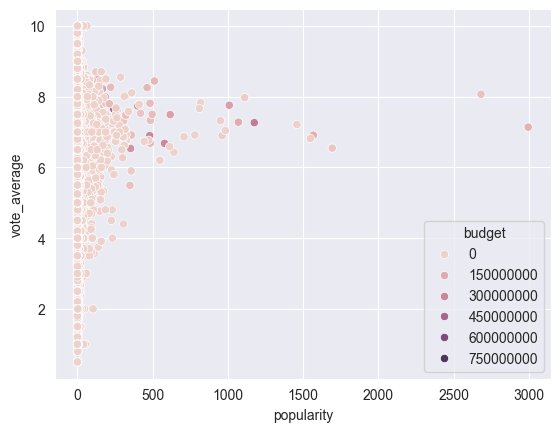

In [7]:
sns.scatterplot(data, x='popularity', y='vote_average', hue='budget', palette='heatmap')

### by Language

In [8]:
languages = data.original_language
top10_languages = languages.value_counts().head(10).index.tolist()
data_top10_languages = data[data['original_language'].isin(top10_languages)]
data_top10_languages_other = data.copy(deep=True)
data_top10_languages_other.original_language = data_top10_languages_other.original_language.apply(lambda x: x if x in top10_languages else 'other')

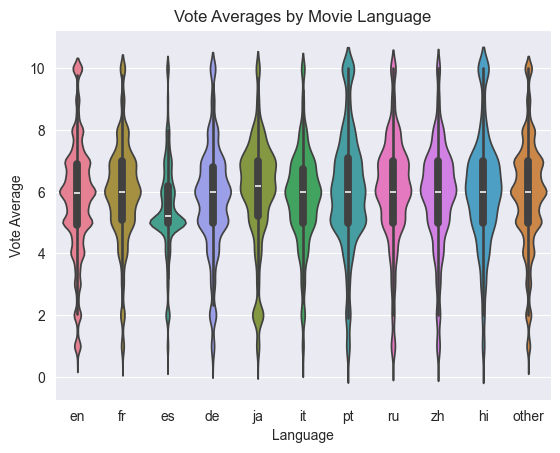

In [9]:
ax = sns.violinplot(data_top10_languages_other, x='original_language', y='vote_average', hue='original_language', order=top10_languages + ['other'])
ax.set_title("Vote Averages by Movie Language")
ax.set_xlabel("Language")
ax.set_ylabel("Vote Average")
plt.show()

### by Genre

In [10]:
data_genres_exploded = data_genres_list.explode('genres')
genres_ordered = data_genres_exploded.genres.value_counts()

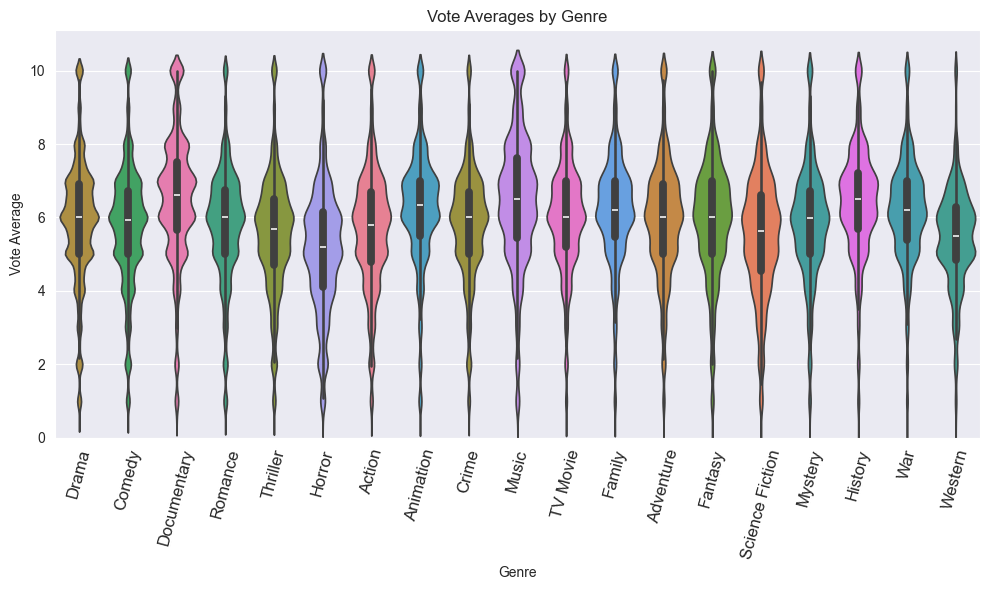

In [11]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(data_genres_exploded.reset_index(), x='genres', y='vote_average', order=genres_ordered.index, hue='genres', legend=False)
ax.set_title("Vote Averages by Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Vote Average")
ax.tick_params(axis='x', labelsize=12, rotation=75)
plt.ylim(ymin=0)
plt.tight_layout()
plt.show()


In [28]:
data_single_genres = data_genres_exploded[~data_genres_exploded.index.duplicated(keep='first')]

In [29]:
data_single_genres.head()

,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,original_title,popularity,genres,production_companies,production_countries,spoken_languages,keywords
0,Inception,8.364,34495,2010-07-15,825532764,148.0,160000000,en,Inception,83.952,Action,"['Legendary Pictures', 'Syncopy', 'Warner Bros...","['United Kingdom', 'United States of America']","['English', 'French', 'Japanese', 'Swahili']","['rescue', 'mission', 'dream', 'airplane', 'pa..."
1,Interstellar,8.417,32571,2014-11-05,701729206,169.0,165000000,en,Interstellar,140.241,Adventure,"['Legendary Pictures', 'Syncopy', 'Lynda Obst ...","['United Kingdom', 'United States of America']",['English'],"['rescue', 'future', 'spacecraft', 'race again..."
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,152.0,185000000,en,The Dark Knight,130.643,Drama,"['DC Comics', 'Legendary Pictures', 'Syncopy',...","['United Kingdom', 'United States of America']","['English', 'Mandarin']","['joker', 'sadism', 'chaos', 'secret identity'..."
3,Avatar,7.573,29815,2009-12-15,2923706026,162.0,237000000,en,Avatar,79.932,Action,"['Dune Entertainment', 'Lightstorm Entertainme...","['United States of America', 'United Kingdom']","['English', 'Spanish']","['future', 'society', 'culture clash', 'space ..."
4,The Avengers,7.710,29166,2012-04-25,1518815515,143.0,220000000,en,The Avengers,98.082,Science Fiction,['Marvel Studios'],['United States of America'],"['English', 'Hindi', 'Russian']","['new york city', 'superhero', 'shield', 'base..."


C:\Users\kiera\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\kiera\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


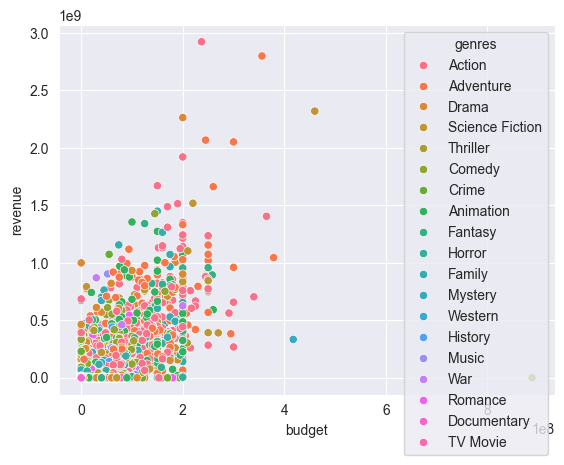

In [31]:
ax = sns.scatterplot(data_single_genres, x='budget', y='revenue', hue='genres', markers='.')

## Genre

### Genre Relations

In [13]:
data_genres_exploded.genres.unique()

array(['Action', 'Science Fiction', 'Adventure', 'Drama', 'Crime',
       'Thriller', 'Fantasy', 'Comedy', 'Romance', 'Western', 'Mystery',
       'War', 'Animation', 'Family', 'Horror', 'Music', 'History',
       'TV Movie', 'Documentary', nan], dtype=object)

In [90]:
def isolate_genre(genre):
    global data
    genre_movies = data.copy(deep=True)
    genre_movies['isGenre'] = genre_movies.genres.apply(lambda x: pd.notna(x) and genre in eval(x))
    genre_movies = genre_movies[genre_movies.isGenre]
    genre_movies.genres = genre_movies.genres.apply(lambda x: [i for i in eval(x) if i != genre])
    genre_movies = genre_movies.explode('genres')
    return genre_movies

In [111]:
isolated_genres = []
for i in genres_ordered.index:
    isolated_genres.append(isolate_genre(i))

In [201]:
val_counts = [i.genres.value_counts() for i in isolated_genres]
val_counts = [i.to_frame().T for i in val_counts]
genre_relations = pd.concat(val_counts)
genre_relations.set_index(genres_ordered.index, inplace=True)
genre_relations = genre_relations[genres_ordered.index.tolist()]
#genre_relations = genre_relations.fillna(0)
genre_relations

genres,Drama,Comedy,Documentary,Romance,Thriller,Horror,Action,Animation,Crime,Music,TV Movie,Family,Adventure,Fantasy,Science Fiction,Mystery,History,War,Western
genres,,,,,,,,,,,,,,,,,,,
Drama,NaN,22223.0,2344.0,22235.0,12968.0,4455.0,10095.0,1991.0,12880.0,3842.0,8937.0,5638.0,4271.0,3850.0,2921.0,5346.0,6456.0,5137.0,1090.0
Comedy,22223.0,NaN,1401.0,14784.0,2208.0,5122.0,5358.0,5922.0,4105.0,4877.0,4127.0,6380.0,3726.0,3694.0,2733.0,1387.0,526.0,509.0,848.0
Documentary,2343.0,1401.0,NaN,150.0,100.0,453.0,305.0,894.0,615.0,4886.0,2316.0,482.0,581.0,163.0,217.0,205.0,3277.0,1116.0,50.0
Romance,22237.0,14784.0,150.0,NaN,1645.0,630.0,2016.0,610.0,1442.0,2276.0,2623.0,1371.0,1348.0,1429.0,642.0,848.0,815.0,754.0,480.0
Thriller,12969.0,2208.0,100.0,1645.0,NaN,7992.0,6562.0,204.0,7426.0,127.0,2656.0,162.0,1207.0,837.0,2188.0,5436.0,332.0,362.0,159.0
Horror,4455.0,5121.0,453.0,630.0,7992.0,NaN,2038.0,819.0,1243.0,291.0,779.0,205.0,675.0,2325.0,2881.0,3339.0,140.0,101.0,145.0
Action,10098.0,5359.0,305.0,2016.0,6562.0,2038.0,NaN,1870.0,5770.0,292.0,1038.0,875.0,5954.0,2152.0,3649.0,884.0,884.0,1191.0,1050.0
Animation,1991.0,5919.0,894.0,610.0,203.0,819.0,1869.0,NaN,248.0,1003.0,536.0,5216.0,2656.0,2864.0,1940.0,360.0,297.0,271.0,132.0
Crime,12885.0,4105.0,615.0,1442.0,7426.0,1243.0,5771.0,248.0,NaN,233.0,1910.0,236.0,1033.0,231.0,290.0,3422.0,285.0,102.0,180.0


In [204]:
corr = genre_relations.corr()
matrix = np.triu(corr)
corr

genres,Drama,Comedy,Documentary,Romance,Thriller,Horror,Action,Animation,Crime,Music,TV Movie,Family,Adventure,Fantasy,Science Fiction,Mystery,History,War,Western
genres,,,,,,,,,,,,,,,,,,,
Drama,1.000000,0.661283,-0.085012,0.809970,0.244715,0.418655,0.460878,0.237330,0.543347,0.397469,0.812220,0.261098,0.248760,0.238792,0.242049,0.365962,-0.055946,0.187842,0.544584
Comedy,0.661283,1.000000,0.118954,0.938285,0.584206,0.189360,0.557178,0.241748,0.632124,0.538099,0.828771,0.626406,0.476702,0.650382,0.406138,0.451738,0.649629,0.727945,0.676403
Documentary,-0.085012,0.118954,1.000000,0.269954,-0.065098,-0.223464,-0.117006,-0.077875,0.024757,0.333652,0.178009,0.120788,-0.190192,-0.108125,-0.256536,-0.118781,0.324711,0.313157,0.063302
Romance,0.809970,0.938285,0.269954,1.000000,0.569617,0.470749,0.696984,0.416638,0.764611,0.660280,0.924731,0.710416,0.498422,0.615799,0.468229,0.493094,0.694337,0.765043,0.730404
Thriller,0.244715,0.584206,-0.065098,0.569617,1.000000,0.611587,0.693759,-0.098347,0.866459,0.091019,0.631537,0.143449,0.341563,0.351200,0.565414,0.943610,0.498637,0.589571,0.518032
Horror,0.418655,0.189360,-0.223464,0.470749,0.611587,1.000000,0.654449,0.172605,0.715385,0.173507,0.509726,0.258661,0.289565,0.310010,0.613972,0.779910,0.121407,0.207096,0.274400
Action,0.460878,0.557178,-0.117006,0.696984,0.693759,0.654449,1.000000,0.212057,0.831516,0.237524,0.729106,0.499729,0.560112,0.517232,0.664438,0.780852,0.472346,0.575047,0.720336
Animation,0.237330,0.241748,-0.077875,0.416638,-0.098347,0.172605,0.212057,1.000000,0.056106,0.419773,0.258515,0.838905,0.662649,0.794052,0.404724,-0.136582,-0.030142,0.008391,0.378396
Crime,0.543347,0.632124,0.024757,0.764611,0.866459,0.715385,0.831516,0.056106,1.000000,0.322028,0.838785,0.357543,0.496012,0.431094,0.623862,0.826829,0.647098,0.749928,0.685041


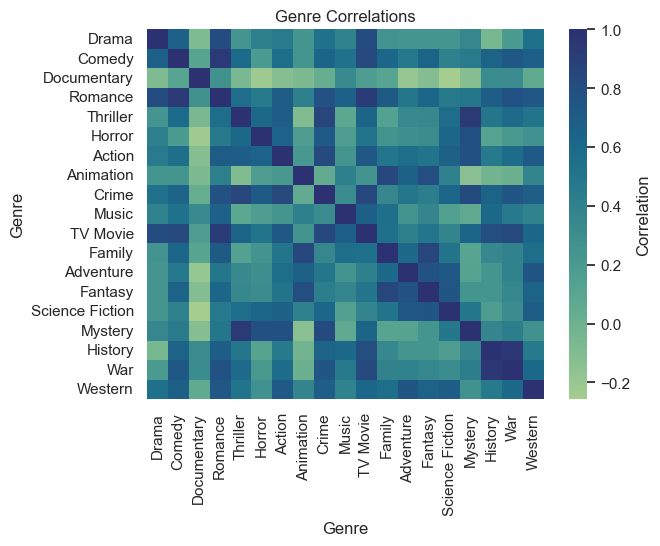

<Figure size 1000x1000 with 0 Axes>

In [222]:
ax = sns.heatmap(corr, cmap='crest', xticklabels=True, yticklabels=True, cbar_kws={'label': 'Correlation'})
sns.set_theme()
ax.set_title("Genre Correlations")
ax.set_xlabel("Genre")
ax.set_ylabel("Genre")
plt.figure(figsize=(10,10))
plt.show()

## Language

### Language Representation

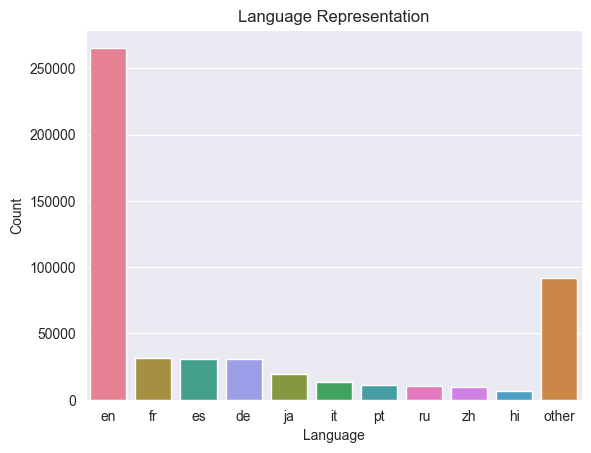

In [21]:
ax = sns.countplot(data=data_top10_languages_other, x='original_language', hue='original_language', palette='husl', order=top10_languages + ['other'])
ax.set_title("Language Representation")
ax.set_xlabel("Language")
ax.set_ylabel("Count")
plt.show()

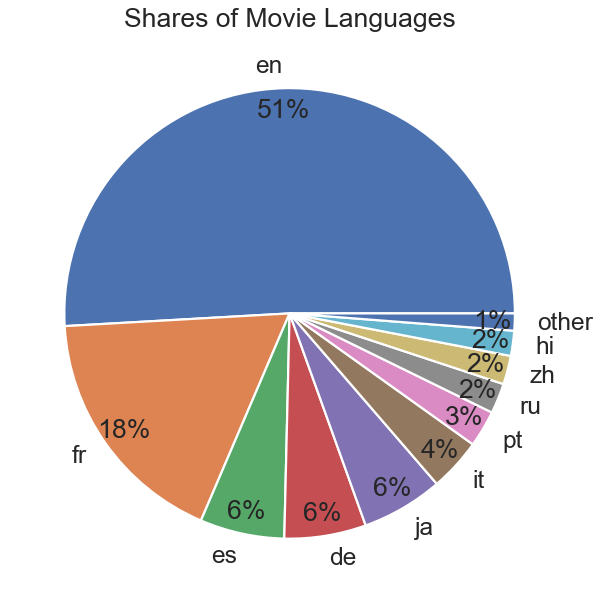

In [93]:
plt.pie(data_top10_languages_other.original_language.value_counts(), labels=top10_languages + ['other'], autopct='%1.0f%%', pctdistance=.9)
sns.set_theme("poster")
plt.title("Shares of Movie Languages")
plt.xlabel(xlabel="", fontsize=14)
plt.show()

In [72]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Pairplot